# Classifiction with python

In this notebook I have tried to practice all the classification algorithms that I have learned in IBM Data Science Professional Certificate.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:

In [1]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
from sklearn import preprocessing
%matplotlib inline

In [2]:
#notice: disable all warnings
import warnings
warnings.filterwarnings('ignore')

## About dataset

This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


## Load Data from csv file

In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.tail()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
341,394,394,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,395,395,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,397,397,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,398,398,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male
345,399,399,COLLECTION,1000,30,9/12/2016,10/11/2016,26,college,male


In [6]:
df.shape

(346, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    346 non-null    int64 
 1   Unnamed: 0      346 non-null    int64 
 2   loan_status     346 non-null    object
 3   Principal       346 non-null    int64 
 4   terms           346 non-null    int64 
 5   effective_date  346 non-null    object
 6   due_date        346 non-null    object
 7   age             346 non-null    int64 
 8   education       346 non-null    object
 9   Gender          346 non-null    object
dtypes: int64(5), object(5)
memory usage: 27.2+ KB


## Convert to date time object

In [8]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data Visualization and pre-processing

Let's see how many of each class is in our dataset.

In [9]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid their loan on time while 86 have gone into collection.


Let's plot some columns to understand data better.

In [10]:
import seaborn as sns

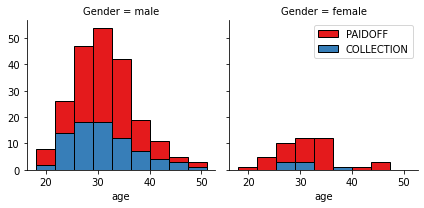

In [12]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col='Gender', hue='loan_status', palette='Set1', col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec='k')
g.axes[-1].legend()
plt.show()

In [ ]:
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col='Gender', hue='loan_status', palette='Set1', col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec='k')
g.axes[-1].legend()
plt.show()

## Pre-processing: Feature Selection/extraction

**Let's look at the day of the week people get the loan.**

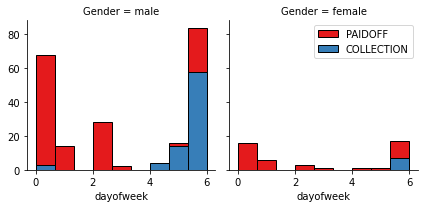

In [14]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col='Gender', hue='loan_status', palette='Set1', col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec='k')
g.axes[-1].legend()
plt.show()

We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4

In [15]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3) else 0)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0.1    346 non-null    int64         
 1   Unnamed: 0      346 non-null    int64         
 2   loan_status     346 non-null    object        
 3   Principal       346 non-null    int64         
 4   terms           346 non-null    int64         
 5   effective_date  346 non-null    datetime64[ns]
 6   due_date        346 non-null    datetime64[ns]
 7   age             346 non-null    int64         
 8   education       346 non-null    object        
 9   Gender          346 non-null    object        
 10  dayofweek       346 non-null    int64         
 11  weekend         346 non-null    int64         
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 32.6+ KB


## Convert Categorical features to numerical values
Let's look at gender.

In [17]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan

Let's convert male to 0 and female to 1:

In [18]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1], inplace=True)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## one Hot Encoding

**How about education?**

In [19]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

**Features before one hot encoding**

In [21]:
df[['Principal','terms','age','Gender','education']]

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college
...,...,...,...,...,...
341,800,15,32,0,High School or Below
342,1000,30,25,0,High School or Below
343,800,15,39,0,college
344,1000,30,28,0,college


**Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame**

In [24]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature, pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis=1, inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


## Feature Selection
Let's define feature sets,X.

In [25]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our labels?

In [26]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data

Data Standardization give data zero mean and unit variance (technically should be done after train test split)

In [30]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification

# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k=3

#we fit the model
knn_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
knn_model

pred = knn_model.predict(X_test)
pred

#to find the max value
accuracies ={}
k_max = 1
acc_max = 0
for k in range(1,10):
    knn_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
    pred = knn_model.predict(X_test)
    accuracies[k] = accuracy_score(y_test, pred)
    print(k, accuracies[k])

1 0.6714285714285714
2 0.6571428571428571
3 0.7142857142857143
4 0.6857142857142857
5 0.7571428571428571
6 0.7142857142857143
7 0.7857142857142857
8 0.7571428571428571
9 0.7571428571428571


In [39]:
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from sklearn import metrics

print('We take k=7')
knn_model = KNeighborsClassifier(n_neighbors= 7).fit(X_train, y_train)

print('Train set accuracy(jaccard):', metrics.accuracy_score(y_train, knn_model.predict(X_train)))
print('Test set accuracy(jaccard):', metrics.accuracy_score(y_test, knn_model.predict(X_test)))

print('Train set accuracy(f1):', f1_score(y_train, knn_model.predict(X_train), average='weighted'))
print('Test set accuracy(f1):', f1_score(y_test, knn_model.predict(X_test), average='weighted'))

We take k=7
Train set accuracy(jaccard): 0.8079710144927537
Test set accuracy(jaccard): 0.7857142857142857
Train set accuracy(f1): 0.8000194668761034
Test set accuracy(f1): 0.7766540244416351


## Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
for d in range(1,10):
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=d).fit(X_train, y_train)
    pred = dt.predict(X_test)
    print(d, accuracy_score(y_test, pred))

1 0.7857142857142857
2 0.7857142857142857
3 0.6142857142857143
4 0.6142857142857143
5 0.6428571428571429
6 0.7714285714285715
7 0.7571428571428571
8 0.7571428571428571
9 0.6571428571428571


In [42]:
print('We take depth=2')
dt = DecisionTreeClassifier(criterion ='entropy', max_depth=2).fit(X_train, y_train)

print('Train set accuracy(jaccard):', metrics.accuracy_score(y_train, dt.predict(X_train)))
print('Test set accuracy(jaccard):', metrics.accuracy_score(y_test, dt.predict(X_test)))

print('Train set accuracy(f1):', f1_score(y_train, dt.predict(X_train), average='weighted'))
print('Test set accuracy(f1):', f1_score(y_test, dt.predict(X_test), average='weighted'))

We take depth=2
Train set accuracy(jaccard): 0.7427536231884058
Test set accuracy(jaccard): 0.7857142857142857
Train set accuracy(f1): 0.6331163939859591
Test set accuracy(f1): 0.6914285714285714


## Support Vector Machine

In [43]:
from sklearn import svm

In [44]:
for k in ('linear', 'poly', 'rbf', 'sigmoid'):
    svm_model = svm.SVC(kernel =k).fit(X_train,y_train)
    svm_pred = svm_model.predict(X_test)
    print('For kernel: {}, the f1 score is: {}' .format(k, f1_score(y_test, svm_pred, average='weighted')))

For kernel: linear, the f1 score is: 0.6914285714285714
For kernel: poly, the f1 score is: 0.7064793130366899
For kernel: rbf, the f1 score is: 0.7275882012724117
For kernel: sigmoid, the f1 score is: 0.6892857142857144


In [45]:
print('So we choose rbf')
svm_model = svm.SVC(kernel= 'rbf').fit(X_train, y_train)

print('Train set accuracy(jaccard):', metrics.accuracy_score(y_train, svm_model.predict(X_train)))
print('Test set accuracy(jaccard):', metrics.accuracy_score(y_test, svm_model.predict(X_test)))

print('Train set accuracy(f1):', f1_score(y_train, svm_model.predict(X_train), average='weighted'))
print('Test set accuracy(f1):', f1_score(y_test, svm_model.predict(X_test), average='weighted'))

So we choose rbf
Train set accuracy(jaccard): 0.782608695652174
Test set accuracy(jaccard): 0.7428571428571429
Train set accuracy(f1): 0.7682165861513688
Test set accuracy(f1): 0.7275882012724117


## Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

In [53]:
for k in ('lbfgs','saga','liblinear','newton-cg','sag'):
    lr_model = LogisticRegression(C= 0.01, solver= k).fit(X_train,y_train)
    lr_pred = lr_model.predict(X_test)
    lr_pred_ = lr_model.predict_proba(X_test)
    print('When solver is {}, logloss is: {}' .format(k, log_loss(y_test, lr_pred_)))

When solver is lbfgs, logloss is: 0.4920179847937498
When solver is saga, logloss is: 0.4919957541150215
When solver is liblinear, logloss is: 0.5772287609479654
When solver is newton-cg, logloss is: 0.492017801467927
When solver is sag, logloss is: 0.49200899587464897


In [54]:
k = 'liblinear'
lr_model = LogisticRegression(C= 0.01, solver= k).fit(X_train,y_train)

print("Train set Accuracy (Jaccard): ", metrics.accuracy_score(y_train, lr_model.predict(X_train)))
print("Test set Accuracy (Jaccard): ", metrics.accuracy_score(y_test, lr_model.predict(X_test)))

print("Train set Accuracy (F1): ", f1_score(y_train, lr_model.predict(X_train), average='weighted'))
print("Test set Accuracy (F1): ", f1_score(y_test, lr_model.predict(X_test), average='weighted'))

Train set Accuracy (Jaccard):  0.7572463768115942
Test set Accuracy (Jaccard):  0.6857142857142857
Train set Accuracy (F1):  0.7341146337750953
Test set Accuracy (F1):  0.6670522459996144


## Model Evaluation using Test Set

In [55]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

### Load test set for evaluation

In [57]:
test_df = pd.read_csv('loan_test.csv')
test_df

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male
5,37,37,PAIDOFF,700,15,9/11/2016,9/25/2016,33,High School or Below,male
6,38,38,PAIDOFF,1000,15,9/11/2016,9/25/2016,24,college,male
7,48,48,PAIDOFF,1000,30,9/11/2016,10/10/2016,32,Bechalor,male
8,50,50,PAIDOFF,800,15,9/11/2016,9/25/2016,27,college,female
9,61,61,PAIDOFF,1000,15,9/11/2016,9/25/2016,37,college,male


In [58]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek

test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

Feature1 = test_df[['Principal','terms','age','Gender','weekend']]
Feature1 = pd.concat([Feature1,pd.get_dummies(test_df['education'])], axis=1)
Feature1.drop(['Master or Above'], axis = 1,inplace=True)

x_loan_test = Feature1
x_loan_test = preprocessing.StandardScaler().fit(x_loan_test).transform(x_loan_test)

y_loan_test = test_df['loan_status'].values

In [62]:
#jaccard list:
knn_pred = knn_model.predict(x_loan_test)
j1 = accuracy_score(y_loan_test, knn_pred)

dt_pred = dt.predict(x_loan_test)
j2 = accuracy_score(y_loan_test, dt_pred)

svm_pred = svm_model.predict(x_loan_test)
j3 = accuracy_score(y_loan_test, svm_pred)

lr_pred = lr_model.predict(x_loan_test)
j4 = accuracy_score(y_loan_test, lr_pred)

jaccard = [j1, j2, j3, j4]
jaccard

[0.6666666666666666,
 0.7407407407407407,
 0.7962962962962963,
 0.7407407407407407]

In [63]:
knn_pred = knn_model.predict(x_loan_test)
f1 = f1_score(y_loan_test, knn_pred, average='weighted')

dt_pred = dt.predict(x_loan_test)
f2 = f1_score(y_loan_test, dt_pred, average='weighted')


svm_pred = svm_model.predict(x_loan_test)
f3 = f1_score(y_loan_test, svm_pred, average='weighted')

lr_pred = lr_model.predict(x_loan_test)
f4 = f1_score(y_loan_test, lr_pred, average='weighted')

f1s = [f1, f2, f3, f4]
f1s

[0.6328400281888654,
 0.6304176516942475,
 0.7583503077293734,
 0.6604267310789049]

In [64]:
from sklearn.metrics import log_loss

lr_pred = lr_model.predict_proba(x_loan_test)
aux = log_loss(y_loan_test, lr_pred)

log_loss = ['NA','NA','NA', aux]
log_loss

['NA', 'NA', 'NA', 0.5672153379912981]

In [65]:
index   = ["KNN", "Decision Tree", "SVM", "Logistic Regression"]
colunms = ["Jaccard", "F1-score", "LogLoss"]

data = [jaccard, f1s, log_loss]
data = np.array(data).T

df = pd.DataFrame(data, index=index, columns=colunms)
df

,Jaccard,F1-score,LogLoss
KNN,0.6666666666666666,0.6328400281888654,NA
Decision Tree,0.7407407407407407,0.6304176516942475,NA
SVM,0.7962962962962963,0.7583503077293734,NA
Logistic Regression,0.7407407407407407,0.6604267310789049,0.5672153379912981
